In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
from tabulate import tabulate

from tsfresh import extract_features
from tsfresh import select_features

In [2]:
df = pd.read_csv("summary.txt", sep = '\t')

filelist = ['vis_p1', 'vis_p2', 'vis_p3', 'naming', 'mem', 'att_p1', 'att_p2', 'att_p3', 'att_p4', 'lang_p1', 'lang_p2', 'abs', 'delayed_recall',  'ori'] 
for i in filelist:
    df[i] = 0

,patient_id,citizen_id,staff_id,education,test_date,test_province,test_location,signature_path,signature_date,consent_version,...,mem,att_p1,att_p2,att_p3,att_p4,lang_p1,lang_p2,abs,delayed_recall,ori
0,002781c8-24b0-4c2c-aec5-211dc202952b,b832d476a1dc0a49214a7b0a029037be2c5b980463ba4c...,bfd7a0a5-982f-403e-b767-96ec3fee642f,14,2021-06-28 03:53:27,1,1,/data/002781c8-24b0-4c2c-aec5-211dc202952b/sig...,2021-06-28 03:54:23,v0.1.0,...,0,0,0,0,0,0,0,0,0,0
1,002b5ee1-4fa5-4c0a-9526-b6b3d2a7a1a8,5a81ea74b75c6063277a13e7f998ae75c51a6cd0b3d554...,f4d48980-9500-4ea3-b036-c4926f6f307d,13,2021-03-18 02:35:49,1,1,/data/002b5ee1-4fa5-4c0a-9526-b6b3d2a7a1a8/sig...,2021-03-18 02:36:53,v0.1.0,...,0,0,0,0,0,0,0,0,0,0
2,006084e4-6e5d-4f5b-b4cb-a4eb32200f68,3203788daf24bad4bd2f1d2e496edbcf9c57e82fb0aeb1...,635630ea-8546-44bd-b702-c6a3e1549cd9,12,2021-02-01 01:31:54,1,1,/data/006084e4-6e5d-4f5b-b4cb-a4eb32200f68/sig...,2021-02-01 01:33:08,v0.1.0,...,0,0,0,0,0,0,0,0,0,0
3,00aa0d0c-2b5f-4c55-bd62-87cd7b0aba12,8c52a8e55d89f59702bd5505ca962b18869bae07d36f32...,bfd7a0a5-982f-403e-b767-96ec3fee642f,11,2021-01-11 02:22:58,1,1,/data/00aa0d0c-2b5f-4c55-bd62-87cd7b0aba12/sig...,2021-01-11 02:27:58,v0.1.0,...,0,0,0,0,0,0,0,0,0,0
4,00c31582-650e-4ecc-9278-1a49d24ef2d8,7c02d5371b5fdc294d26314dd8d826586541a858bdc07c...,f4d48980-9500-4ea3-b036-c4926f6f307d,14,2021-03-01 01:28:23,1,1,/data/00c31582-650e-4ecc-9278-1a49d24ef2d8/sig...,2021-03-01 01:30:04,v0.1.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1192,fde03fc3-0fa0-481a-8601-af76d60b71f7,99b4e136e3dcd075ab7b2e6210bad9054167ce75b788cc...,f4d48980-9500-4ea3-b036-c4926f6f307d,1,2021-03-03 01:49:56,1,1,/data/fde03fc3-0fa0-481a-8601-af76d60b71f7/sig...,2021-03-03 01:54:19,v0.1.0,...,0,0,0,0,0,0,0,0,0,0
1193,fe2abbaa-d6a9-419f-8b7a-3852fd6a8557,d7dcfabfbadaad73977f0f59507d28e5badb6e6d9e3f72...,179de1ce-2095-4ea1-85a1-04b3288f6779,1,2021-04-20 11:50:15,1,1,/data/fe2abbaa-d6a9-419f-8b7a-3852fd6a8557/sig...,2021-04-20 11:50:55,v0.1.0,...,0,0,0,0,0,0,0,0,0,0
1194,fe713ebc-4b24-4765-ba6d-714cc93fa88e,015a370d2b9b1211d3249c5663fc5432b3140297e2b51d...,bfd7a0a5-982f-403e-b767-96ec3fee642f,12,2021-02-23 01:37:33,1,1,/data/fe713ebc-4b24-4765-ba6d-714cc93fa88e/sig...,2021-02-23 01:38:37,v0.1.0,...,0,0,0,0,0,0,0,0,0,0
1195,ff3345fa-fe78-43d4-aa1c-ec1067cf2088,5adf84617d64509b2a2ade938196e3f7f97204aadfec8b...,a6d5b43e-f39d-42fc-a998-95b297afc330,13,2021-02-22 07:20:31,1,1,/data/ff3345fa-fe78-43d4-aa1c-ec1067cf2088/sig...,2021-02-22 07:21:42,v0.1.0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
for i in filelist:

    df1 = pd.read_csv(i+'.txt', sep = '\t')
    for j in range(df1.shape[0]):
        for k in range(df.shape[0]):
            if df1.loc[j,'patient_id'] == df.loc[k,'patient_id']:
                df.loc[k,i] = df1.loc[j,'score']

,patient_id,citizen_id,staff_id,education,test_date,test_province,test_location,signature_path,signature_date,consent_version,...,mem,att_p1,att_p2,att_p3,att_p4,lang_p1,lang_p2,abs,delayed_recall,ori
0,002781c8-24b0-4c2c-aec5-211dc202952b,b832d476a1dc0a49214a7b0a029037be2c5b980463ba4c...,bfd7a0a5-982f-403e-b767-96ec3fee642f,14,2021-06-28 03:53:27,1,1,/data/002781c8-24b0-4c2c-aec5-211dc202952b/sig...,2021-06-28 03:54:23,v0.1.0,...,0,1,1,1,3,2,1,2,5,5
1,002b5ee1-4fa5-4c0a-9526-b6b3d2a7a1a8,5a81ea74b75c6063277a13e7f998ae75c51a6cd0b3d554...,f4d48980-9500-4ea3-b036-c4926f6f307d,13,2021-03-18 02:35:49,1,1,/data/002b5ee1-4fa5-4c0a-9526-b6b3d2a7a1a8/sig...,2021-03-18 02:36:53,v0.1.0,...,0,1,1,1,3,2,1,2,4,6
2,006084e4-6e5d-4f5b-b4cb-a4eb32200f68,3203788daf24bad4bd2f1d2e496edbcf9c57e82fb0aeb1...,635630ea-8546-44bd-b702-c6a3e1549cd9,12,2021-02-01 01:31:54,1,1,/data/006084e4-6e5d-4f5b-b4cb-a4eb32200f68/sig...,2021-02-01 01:33:08,v0.1.0,...,0,1,1,1,2,0,0,2,4,6
3,00aa0d0c-2b5f-4c55-bd62-87cd7b0aba12,8c52a8e55d89f59702bd5505ca962b18869bae07d36f32...,bfd7a0a5-982f-403e-b767-96ec3fee642f,11,2021-01-11 02:22:58,1,1,/data/00aa0d0c-2b5f-4c55-bd62-87cd7b0aba12/sig...,2021-01-11 02:27:58,v0.1.0,...,0,1,1,1,3,1,0,2,4,6
4,00c31582-650e-4ecc-9278-1a49d24ef2d8,7c02d5371b5fdc294d26314dd8d826586541a858bdc07c...,f4d48980-9500-4ea3-b036-c4926f6f307d,14,2021-03-01 01:28:23,1,1,/data/00c31582-650e-4ecc-9278-1a49d24ef2d8/sig...,2021-03-01 01:30:04,v0.1.0,...,0,1,1,1,3,2,1,2,3,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1192,fde03fc3-0fa0-481a-8601-af76d60b71f7,99b4e136e3dcd075ab7b2e6210bad9054167ce75b788cc...,f4d48980-9500-4ea3-b036-c4926f6f307d,1,2021-03-03 01:49:56,1,1,/data/fde03fc3-0fa0-481a-8601-af76d60b71f7/sig...,2021-03-03 01:54:19,v0.1.0,...,0,1,0,0,0,0,0,0,0,2
1193,fe2abbaa-d6a9-419f-8b7a-3852fd6a8557,d7dcfabfbadaad73977f0f59507d28e5badb6e6d9e3f72...,179de1ce-2095-4ea1-85a1-04b3288f6779,1,2021-04-20 11:50:15,1,1,/data/fe2abbaa-d6a9-419f-8b7a-3852fd6a8557/sig...,2021-04-20 11:50:55,v0.1.0,...,0,0,0,0,0,0,0,0,0,0
1194,fe713ebc-4b24-4765-ba6d-714cc93fa88e,015a370d2b9b1211d3249c5663fc5432b3140297e2b51d...,bfd7a0a5-982f-403e-b767-96ec3fee642f,12,2021-02-23 01:37:33,1,1,/data/fe713ebc-4b24-4765-ba6d-714cc93fa88e/sig...,2021-02-23 01:38:37,v0.1.0,...,0,0,1,1,3,0,1,0,4,6
1195,ff3345fa-fe78-43d4-aa1c-ec1067cf2088,5adf84617d64509b2a2ade938196e3f7f97204aadfec8b...,a6d5b43e-f39d-42fc-a998-95b297afc330,13,2021-02-22 07:20:31,1,1,/data/ff3345fa-fe78-43d4-aa1c-ec1067cf2088/sig...,2021-02-22 07:21:42,v0.1.0,...,0,1,1,1,3,1,0,1,5,6


In [4]:
df['total_score'] = 0
for i in range(df.shape[0]):
    sum = 0
    for j in filelist:
        sum += df.loc[i,j]
    df.loc[i,'total_score'] = sum

<Axes: xlabel='total_score', ylabel='Count'>

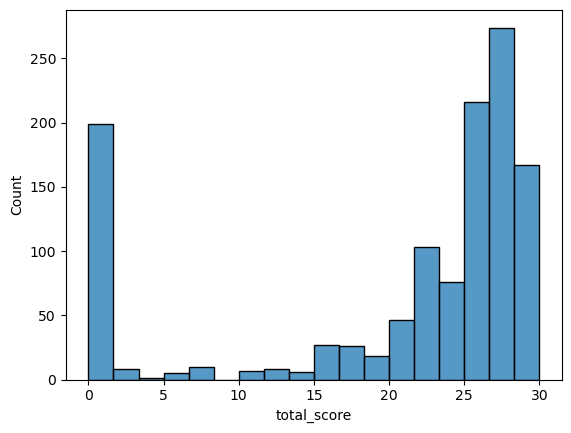

In [5]:
sns.histplot(data=df, x='total_score')

In [ ]:
df.to_csv('extracted_score.csv')

In [49]:
df = pd.read_csv("extracted_score.csv", index_col = 0)
df['dementia'] = 0

for i in range(df.shape[0]):
    if df.loc[i,'total_score'] < 25:
        df.loc[i,'dementia'] = 1       #assigns a score of 1 to people with dementia and 0 to normal people 

In [10]:
clock = pd.read_csv("clock.txt", sep = '\t')
display(clock)

,patient_id,num,posx,posy,drawtime,azimuth,altitude,force_strength,pencil_mode,is_begin
0,002781c8-24b0-4c2c-aec5-211dc202952b,0,200.5,133.0,0,0.849559,0.890590,0.333333,1,1
1,002781c8-24b0-4c2c-aec5-211dc202952b,1,200.0,133.0,3,0.849559,0.890590,0.333333,1,0
2,002781c8-24b0-4c2c-aec5-211dc202952b,2,198.0,133.0,25,0.849559,0.890590,0.333333,1,0
3,002781c8-24b0-4c2c-aec5-211dc202952b,3,197.5,133.5,28,0.849559,0.890590,0.333333,1,0
4,002781c8-24b0-4c2c-aec5-211dc202952b,4,197.0,133.5,38,0.849559,0.890590,0.282031,1,0
...,...,...,...,...,...,...,...,...,...,...
2172414,ff3345fa-fe78-43d4-aa1c-ec1067cf2088,1731,313.5,187.0,36030,0.761012,0.826381,0.411365,1,0
2172415,ff3345fa-fe78-43d4-aa1c-ec1067cf2088,1732,313.5,187.0,36035,0.761012,0.826381,0.435434,1,0
2172416,ff3345fa-fe78-43d4-aa1c-ec1067cf2088,1733,313.5,186.5,36043,0.761012,0.826381,0.434023,1,0
2172417,ff3345fa-fe78-43d4-aa1c-ec1067cf2088,1734,313.5,186.5,36060,0.761012,0.826381,0.440118,1,0


In [11]:
extracted_features = extract_features(clock, column_id="patient_id", column_sort="drawtime")

Feature Extraction: 100%|██████████████████| 20/20 [13:15:36<00:00, 2386.83s/it]


In [17]:
display(extracted_features)

,num__variance_larger_than_standard_deviation,num__has_duplicate_max,num__has_duplicate_min,num__has_duplicate,num__sum_values,num__abs_energy,num__mean_abs_change,num__mean_change,num__mean_second_derivative_central,num__median,...,is_begin__fourier_entropy__bins_5,is_begin__fourier_entropy__bins_10,is_begin__fourier_entropy__bins_100,is_begin__permutation_entropy__dimension_3__tau_1,is_begin__permutation_entropy__dimension_4__tau_1,is_begin__permutation_entropy__dimension_5__tau_1,is_begin__permutation_entropy__dimension_6__tau_1,is_begin__permutation_entropy__dimension_7__tau_1,is_begin__query_similarity_count__query_None__threshold_0.0,is_begin__mean_n_absolute_max__number_of_maxima_7
002781c8-24b0-4c2c-aec5-211dc202952b,1.0,0.0,0.0,0.0,2203950.0,3.084795e+09,1.0,1.0,0.0,1049.5,...,1.345411,1.994292,4.038068,0.178964,0.267107,0.354987,0.446338,0.533614,0.0,1.0
002b5ee1-4fa5-4c0a-9526-b6b3d2a7a1a8,1.0,0.0,0.0,0.0,1026028.0,9.798567e+08,1.0,1.0,0.0,716.0,...,1.310210,1.956660,3.916600,0.155732,0.231930,0.307988,0.383900,0.459662,0.0,1.0
006084e4-6e5d-4f5b-b4cb-a4eb32200f68,1.0,0.0,0.0,0.0,1963171.0,2.593349e+09,1.0,1.0,0.0,990.5,...,1.283802,1.952294,3.881464,0.141869,0.211536,0.281080,0.350498,0.421950,0.0,1.0
00aa0d0c-2b5f-4c55-bd62-87cd7b0aba12,1.0,0.0,0.0,0.0,3019653.0,4.947198e+09,1.0,1.0,0.0,1228.5,...,1.156816,1.752877,3.696192,0.122735,0.183063,0.243307,0.303463,0.363531,0.0,1.0
00c31582-650e-4ecc-9278-1a49d24ef2d8,1.0,0.0,0.0,0.0,1846081.0,2.364830e+09,1.0,1.0,0.0,960.5,...,1.308635,1.917590,3.809882,0.154227,0.230014,0.305640,0.381103,0.456398,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
fdace06a-f4e8-4a9f-8190-5ec1778cd033,1.0,0.0,0.0,0.0,810901.0,6.884549e+08,1.0,1.0,0.0,636.5,...,1.394976,2.039454,3.916461,0.196027,0.292086,0.387851,0.483312,0.578457,0.0,1.0
fdb44384-e7ce-4ca7-89b6-e72fdea44fe7,1.0,0.0,0.0,0.0,2106378.0,2.882227e+09,1.0,1.0,0.0,1026.0,...,1.262996,1.880442,3.703854,0.135693,0.203347,0.270900,0.338350,0.405694,0.0,1.0
fde03fc3-0fa0-481a-8601-af76d60b71f7,1.0,0.0,0.0,0.0,690900.0,5.414353e+08,1.0,1.0,0.0,587.5,...,1.498002,2.143199,3.956152,0.093986,0.138936,0.183889,0.228844,0.273801,0.0,1.0
fe713ebc-4b24-4765-ba6d-714cc93fa88e,1.0,0.0,0.0,0.0,775635.0,6.440356e+08,1.0,1.0,0.0,622.5,...,1.288090,1.949621,3.911730,0.196633,0.294653,0.392402,0.489868,0.587043,0.0,1.0


In [76]:
extracted_features['dementia'] = pd.NA

,patient_id,citizen_id,staff_id,education,test_date,test_province,test_location,signature_path,signature_date,consent_version,...,att_p2,att_p3,att_p4,lang_p1,lang_p2,abs,delayed_recall,ori,total_score,dementia
0,002781c8-24b0-4c2c-aec5-211dc202952b,b832d476a1dc0a49214a7b0a029037be2c5b980463ba4c...,bfd7a0a5-982f-403e-b767-96ec3fee642f,14,2021-06-28 03:53:27,1,1,/data/002781c8-24b0-4c2c-aec5-211dc202952b/sig...,2021-06-28 03:54:23,v0.1.0,...,1,1,3,2,1,2,5,5,28,0
1,002b5ee1-4fa5-4c0a-9526-b6b3d2a7a1a8,5a81ea74b75c6063277a13e7f998ae75c51a6cd0b3d554...,f4d48980-9500-4ea3-b036-c4926f6f307d,13,2021-03-18 02:35:49,1,1,/data/002b5ee1-4fa5-4c0a-9526-b6b3d2a7a1a8/sig...,2021-03-18 02:36:53,v0.1.0,...,1,1,3,2,1,2,4,6,29,0
2,006084e4-6e5d-4f5b-b4cb-a4eb32200f68,3203788daf24bad4bd2f1d2e496edbcf9c57e82fb0aeb1...,635630ea-8546-44bd-b702-c6a3e1549cd9,12,2021-02-01 01:31:54,1,1,/data/006084e4-6e5d-4f5b-b4cb-a4eb32200f68/sig...,2021-02-01 01:33:08,v0.1.0,...,1,1,2,0,0,2,4,6,25,0
3,00aa0d0c-2b5f-4c55-bd62-87cd7b0aba12,8c52a8e55d89f59702bd5505ca962b18869bae07d36f32...,bfd7a0a5-982f-403e-b767-96ec3fee642f,11,2021-01-11 02:22:58,1,1,/data/00aa0d0c-2b5f-4c55-bd62-87cd7b0aba12/sig...,2021-01-11 02:27:58,v0.1.0,...,1,1,3,1,0,2,4,6,23,1
4,00c31582-650e-4ecc-9278-1a49d24ef2d8,7c02d5371b5fdc294d26314dd8d826586541a858bdc07c...,f4d48980-9500-4ea3-b036-c4926f6f307d,14,2021-03-01 01:28:23,1,1,/data/00c31582-650e-4ecc-9278-1a49d24ef2d8/sig...,2021-03-01 01:30:04,v0.1.0,...,1,1,3,2,1,2,3,6,28,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1192,fde03fc3-0fa0-481a-8601-af76d60b71f7,99b4e136e3dcd075ab7b2e6210bad9054167ce75b788cc...,f4d48980-9500-4ea3-b036-c4926f6f307d,1,2021-03-03 01:49:56,1,1,/data/fde03fc3-0fa0-481a-8601-af76d60b71f7/sig...,2021-03-03 01:54:19,v0.1.0,...,0,0,0,0,0,0,0,2,3,1
1193,fe2abbaa-d6a9-419f-8b7a-3852fd6a8557,d7dcfabfbadaad73977f0f59507d28e5badb6e6d9e3f72...,179de1ce-2095-4ea1-85a1-04b3288f6779,1,2021-04-20 11:50:15,1,1,/data/fe2abbaa-d6a9-419f-8b7a-3852fd6a8557/sig...,2021-04-20 11:50:55,v0.1.0,...,0,0,0,0,0,0,0,0,0,1
1194,fe713ebc-4b24-4765-ba6d-714cc93fa88e,015a370d2b9b1211d3249c5663fc5432b3140297e2b51d...,bfd7a0a5-982f-403e-b767-96ec3fee642f,12,2021-02-23 01:37:33,1,1,/data/fe713ebc-4b24-4765-ba6d-714cc93fa88e/sig...,2021-02-23 01:38:37,v0.1.0,...,1,1,3,0,1,0,4,6,24,1
1195,ff3345fa-fe78-43d4-aa1c-ec1067cf2088,5adf84617d64509b2a2ade938196e3f7f97204aadfec8b...,a6d5b43e-f39d-42fc-a998-95b297afc330,13,2021-02-22 07:20:31,1,1,/data/ff3345fa-fe78-43d4-aa1c-ec1067cf2088/sig...,2021-02-22 07:21:42,v0.1.0,...,1,1,3,1,0,1,5,6,26,0


,num__variance_larger_than_standard_deviation,num__has_duplicate_max,num__has_duplicate_min,num__has_duplicate,num__sum_values,num__abs_energy,num__mean_abs_change,num__mean_change,num__mean_second_derivative_central,num__median,...,is_begin__fourier_entropy__bins_10,is_begin__fourier_entropy__bins_100,is_begin__permutation_entropy__dimension_3__tau_1,is_begin__permutation_entropy__dimension_4__tau_1,is_begin__permutation_entropy__dimension_5__tau_1,is_begin__permutation_entropy__dimension_6__tau_1,is_begin__permutation_entropy__dimension_7__tau_1,is_begin__query_similarity_count__query_None__threshold_0.0,is_begin__mean_n_absolute_max__number_of_maxima_7,dementia
002781c8-24b0-4c2c-aec5-211dc202952b,1.0,0.0,0.0,0.0,2203950.0,3.084795e+09,1.0,1.0,0.0,1049.5,...,1.994292,4.038068,0.178964,0.267107,0.354987,0.446338,0.533614,0.0,1.0,NaN
002b5ee1-4fa5-4c0a-9526-b6b3d2a7a1a8,1.0,0.0,0.0,0.0,1026028.0,9.798567e+08,1.0,1.0,0.0,716.0,...,1.956660,3.916600,0.155732,0.231930,0.307988,0.383900,0.459662,0.0,1.0,NaN
006084e4-6e5d-4f5b-b4cb-a4eb32200f68,1.0,0.0,0.0,0.0,1963171.0,2.593349e+09,1.0,1.0,0.0,990.5,...,1.952294,3.881464,0.141869,0.211536,0.281080,0.350498,0.421950,0.0,1.0,NaN
00aa0d0c-2b5f-4c55-bd62-87cd7b0aba12,1.0,0.0,0.0,0.0,3019653.0,4.947198e+09,1.0,1.0,0.0,1228.5,...,1.752877,3.696192,0.122735,0.183063,0.243307,0.303463,0.363531,0.0,1.0,NaN
00c31582-650e-4ecc-9278-1a49d24ef2d8,1.0,0.0,0.0,0.0,1846081.0,2.364830e+09,1.0,1.0,0.0,960.5,...,1.917590,3.809882,0.154227,0.230014,0.305640,0.381103,0.456398,0.0,1.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
fdace06a-f4e8-4a9f-8190-5ec1778cd033,1.0,0.0,0.0,0.0,810901.0,6.884549e+08,1.0,1.0,0.0,636.5,...,2.039454,3.916461,0.196027,0.292086,0.387851,0.483312,0.578457,0.0,1.0,NaN
fdb44384-e7ce-4ca7-89b6-e72fdea44fe7,1.0,0.0,0.0,0.0,2106378.0,2.882227e+09,1.0,1.0,0.0,1026.0,...,1.880442,3.703854,0.135693,0.203347,0.270900,0.338350,0.405694,0.0,1.0,NaN
fde03fc3-0fa0-481a-8601-af76d60b71f7,1.0,0.0,0.0,0.0,690900.0,5.414353e+08,1.0,1.0,0.0,587.5,...,2.143199,3.956152,0.093986,0.138936,0.183889,0.228844,0.273801,0.0,1.0,NaN
fe713ebc-4b24-4765-ba6d-714cc93fa88e,1.0,0.0,0.0,0.0,775635.0,6.440356e+08,1.0,1.0,0.0,622.5,...,1.949621,3.911730,0.196633,0.294653,0.392402,0.489868,0.587043,0.0,1.0,NaN


In [77]:
for i in range(extracted_features.shape[0]):
    for j in range(df.shape[0]):
        if df.loc[j, 'patient_id'] == extracted_features.index[i]:
            extracted_features.iloc[i, -1] = df.loc[j, 'dementia']

1012


<function IPython.core.display_functions.display(*objs, include=None, exclude=None, metadata=None, transient=None, display_id=None, raw=False, clear=False, **kwargs)>

In [ ]:
newef = extracted_features.dropna()

display(newef)

In [97]:
features_filtered = select_features(newef.iloc[:, 0:-1], newef.loc[:,'dementia'])

In [98]:
extracted_features.to_csv('extracted_features.csv')
newef.to_csv('newef.csv')

In [100]:
display(features_filtered)

,"force_strength__change_quantiles__f_agg_""mean""__isabs_True__qh_0.2__ql_0.0","is_begin__fft_coefficient__attr_""real""__coeff_1",force_strength__first_location_of_minimum,force_strength__quantile__q_0.1,"force_strength__change_quantiles__f_agg_""var""__isabs_False__qh_0.2__ql_0.0","force_strength__change_quantiles__f_agg_""var""__isabs_True__qh_0.2__ql_0.0",azimuth__lempel_ziv_complexity__bins_100,force_strength__symmetry_looking__r_0.15000000000000002,azimuth__approximate_entropy__m_2__r_0.1,azimuth__permutation_entropy__dimension_4__tau_1,...,"altitude__agg_linear_trend__attr_""slope""__chunk_len_50__f_agg_""min""",force_strength__ar_coefficient__coeff_1__k_10,altitude__time_reversal_asymmetry_statistic__lag_1,"is_begin__agg_linear_trend__attr_""slope""__chunk_len_50__f_agg_""max""","pencil_mode__agg_linear_trend__attr_""intercept""__chunk_len_5__f_agg_""var""",num__lempel_ziv_complexity__bins_100,"is_begin__fft_aggregated__aggtype_""centroid""","force_strength__linear_trend__attr_""pvalue""",num__lempel_ziv_complexity__bins_5,posy__lempel_ziv_complexity__bins_5
002781c8-24b0-4c2c-aec5-211dc202952b,0.052672,-12.555490,0.280000,0.306860,0.009053,0.006279,0.223333,1.0,0.129847,0.428171,...,-0.007957,1.210182,-0.000253,0.005024,0.000000,0.285714,526.749598,7.032924e-90,0.068571,0.076667
002b5ee1-4fa5-4c0a-9526-b6b3d2a7a1a8,0.053011,-8.425158,0.416609,0.333333,0.008188,0.005379,0.265876,1.0,0.152044,0.671841,...,-0.000183,1.231252,0.000299,0.011823,0.000000,0.348221,357.517883,1.175009e-52,0.083043,0.094906
006084e4-6e5d-4f5b-b4cb-a4eb32200f68,0.043852,-4.060119,0.474268,0.316943,0.006057,0.004135,0.210898,1.0,0.087869,0.412681,...,-0.000552,1.266257,0.000145,0.013321,0.000000,0.302220,496.033321,5.392780e-32,0.070131,0.080222
00aa0d0c-2b5f-4c55-bd62-87cd7b0aba12,0.021842,-3.425255,0.015053,0.212454,0.001537,0.001064,0.234337,1.0,0.072801,0.780259,...,0.000530,1.263344,0.000114,0.014022,0.000000,0.284378,614.417034,4.591593e-128,0.062653,0.071196
00c31582-650e-4ecc-9278-1a49d24ef2d8,0.010642,-10.675353,0.206035,0.111632,0.000472,0.000360,0.214880,1.0,0.150058,0.511154,...,-0.003225,1.024769,-0.000121,-0.007085,0.000000,0.311655,482.543267,3.810619e-26,0.072320,0.078564
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
fdace06a-f4e8-4a9f-8190-5ec1778cd033,0.033866,-3.394127,0.314757,0.202414,0.002561,0.001545,0.251177,1.0,0.150421,0.544927,...,-0.000897,1.148395,0.000073,0.002393,0.000000,0.391680,320.019939,7.039396e-37,0.088697,0.106750
fdb44384-e7ce-4ca7-89b6-e72fdea44fe7,0.023801,-9.477432,0.515343,0.248223,0.001654,0.001103,0.222601,1.0,0.129579,0.608098,...,0.002538,1.175096,-0.000015,-0.006239,-0.000433,0.291768,505.004879,3.666468e-20,0.070141,0.079396
fde03fc3-0fa0-481a-8601-af76d60b71f7,0.040440,0.343295,0.011054,0.243648,0.005970,0.004335,0.264456,1.0,0.103534,0.438990,...,-0.000581,1.281594,0.000123,0.013913,0.000000,0.403912,293.808534,1.176803e-05,0.092687,0.097789
fe713ebc-4b24-4765-ba6d-714cc93fa88e,0.036703,-7.032788,0.336276,0.283479,0.005136,0.003789,0.203852,1.0,0.157817,0.313268,...,-0.000863,1.216291,0.000058,-0.028462,0.000000,0.400482,306.827633,3.119840e-02,0.087480,0.081862


In [101]:
newef.loc[:,'dementia'].to_csv('label.csv')
features_filtered.to_csv('features_filtered.csv')